In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import pylab as pl
from IPython import display
import time
from matplotlib import animation 
from mpl_toolkits import mplot3d
%matplotlib inline
plt.style.use('ggplot')
from pylab import figure, subplot, hist, xlim, show

In [4]:
group1_1 = pd.read_excel('C:\Users\User\Desktop\Destop13_04_2020\StudyData1\group1_1.xlsx')
group2_1 = pd.read_excel('C:\Users\User\Desktop\Destop13_04_2020\StudyData1\group2_1.xlsx')
group3_1 = pd.read_excel('C:\Users\User\Desktop\Destop13_04_2020\StudyData1\group6_1.xlsx')
group4_1 = pd.read_excel('C:\Users\User\Desktop\Destop13_04_2020\StudyData1\group3_1.xlsx')
group5_1 = pd.read_excel('C:\Users\User\Desktop\Destop13_04_2020\StudyData1\group5_1.xlsx')

In [7]:
grp1MemList = ['Ranco','Lucas', 'charis',  'United']
grp2MemList = ['Carbon', 'oluwalonimi', 'smith', 'Arrival']
grp3MemList = ['cls603','Epigha', 'Beowulf', 'Anonymous1']
grp4MemList = ['smart', 'Swift', 'jade', 'the unknown']
grp5MemList = ['Craig', 'sir D', 'Karatu', 'Mide']



In [8]:
group1_1 = group1_1[group1_1['Word Count']>0]
group2_1 = group2_1[group2_1['Word Count']>0]
group3_1 = group3_1[group3_1['Word Count']>0]
group4_1 = group4_1[group4_1['Word Count']>0]
group5_1 = group5_1[group5_1['Word Count']>0]

In [9]:
group1_1 = group1_1[['username', 'message']]
group2_1 = group2_1[['username', 'message']]
group3_1 = group3_1[['username', 'message']]
group4_1 = group4_1[['username', 'message']]
group5_1 = group5_1[['username', 'message']]


    

In [10]:
def selectFromGroup(gr, start, end):
    grpO = gr
    grpDataL=gr.shape[0]  #get the number of rows in group data
    
    if end<grpDataL:  #check if 'num' is not more that the number of rows in groupData
        grp=gr.iloc[start:end] # get first 'num' rows of dataframe
        #grp['Word Count']=0
        return grp
    else:
        return grpO

In [11]:
def synchronyMeasure(Nparticipant, NContributor):
    idealSync = float((Nparticipant-1)*(Nparticipant))
    
    trueSync = float((NContributor-1)*(NContributor))
    
    syncMeasure = (trueSync/idealSync)
    
    return syncMeasure

In [12]:
def unitSegSCLevelDiffContributor(unitSeg, grpSize, grpMem):
    difContributor=[]
    selectData = unitSeg
    contributorUsername = selectData['username'].tolist()
    uniqueContributor = set(contributorUsername)
    
    numInvolved = len(uniqueContributor)
    syncValue = synchronyMeasure(grpSize, numInvolved)
    
    for mem in uniqueContributor:
        if(mem in grpMem):
            memIndex = grpMem.index(mem)
            difContributor.append(memIndex)
            
    
       
    return syncValue, difContributor 

In [13]:
#uSynch, uDiffCont = unitSegSCLevelDiffContributor(group1_1, 4, grp1MemList)

In [14]:
def DiscourseSCLevelDiffContributor(group, grpSize, grpMem):
    discourseRowLength = group.shape[0]
    syncList =[]
    difContList=[]
    start = 0
    end =grpSize-1
    
    for i in xrange(grpSize ,discourseRowLength, grpSize):
        selectData=selectFromGroup(group, start, end)
        sync,difCont = unitSegSCLevelDiffContributor(selectData, grpSize, grpMem)
        syncList.append(sync)
        difContList.append(difCont)
        
        start=start+grpSize
        end=start+(grpSize-1)
        
    
    return syncList,difContList

In [15]:
gSynch1,gDiffCont1 = DiscourseSCLevelDiffContributor(group1_1, 4, grp1MemList)
gSynch2,gDiffCont2 = DiscourseSCLevelDiffContributor(group2_1, 4, grp2MemList)
gSynch3,gDiffCont3 = DiscourseSCLevelDiffContributor(group3_1, 4, grp3MemList)
gSynch4,gDiffCont4 = DiscourseSCLevelDiffContributor(group4_1, 4, grp4MemList)
gSynch5,gDiffCont5 = DiscourseSCLevelDiffContributor(group5_1, 4, grp5MemList)


In [16]:
def getX_Data(yDataList):
    My_list = [] # Value to begin and end with 
    start = 0
    end = len(yDataList) - 1 # Check if start value is smaller than end value 
    # unpack the result 
    My_list.extend(range(start, end)) 
    # Append the last value 
    My_list.append(end) 
    
    return My_list

In [17]:
x1Data = getX_Data(gSynch1)
x2Data = getX_Data(gSynch2)
x3Data = getX_Data(gSynch3)
x4Data = getX_Data(gSynch4)
x5Data = getX_Data(gSynch5)




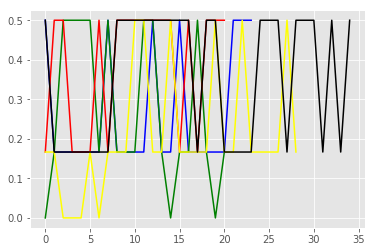

In [18]:
plt.plot(x1Data, gSynch1, color="blue")
plt.plot(x2Data, gSynch2, color="green")
plt.plot(x3Data, gSynch3, color="red")
plt.plot(x4Data, gSynch4, color="yellow")
plt.plot(x5Data, gSynch5, color="black")

plt.show()

In [19]:
print gDiffCont1 

[[2, 0, 1], [0, 1], [1], [0, 1], [0, 1], [0, 1], [3, 1], [3, 0, 1], [3], [0, 1], [3, 0], [0, 1], [3, 0, 1], [3, 1], [0], [3, 0, 1], [3, 1], [3], [3], [3, 0], [0, 1], [3], [3, 1], [0, 1]]


In [20]:
dLen = len(gDiffCont3)
print dLen

21


In [21]:
def getY_Data(yDataList):
    My_list = [] # Value to begin and end with 
    start = 1
    end = len(yDataList) # Check if start value is smaller than end value 
    # unpack the result 
    My_list.extend(range(start, end)) 
    # Append the last value 
    My_list.append(end) 
    
    return My_list

In [22]:
yList = getY_Data(gDiffCont1[0])
xMain = getY_Data(gDiffCont1)
print xMain

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]


In [23]:
def colorList(gList):
    cList=[]
    for i in gList:
        c=""
        if (i==0):
            c="blue"
        if (i==1):
            c="red"
        if (i==2):
            c="green"
        if (i==3):
            c="black"
        cList.append(c)
    return cList
            

In [24]:
cList =colorList(gDiffCont1[0])
print cList

['green', 'blue', 'red']


In [25]:
l =[1]*dLen

In [26]:
print l

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [59]:

def plotDiffContSeq(groupDiffList, saveFig):
    plt.figure(num=None, figsize=(4, 1), dpi=80)
    xMain = getY_Data(groupDiffList)
    for data, xSeq in zip(groupDiffList, xMain):
        dLen = len(data)
        xData = [xSeq]*dLen
        yData = getY_Data(data)
        cList =colorList(data)
        yint = [1,2,3]
        plt.yticks(yint)
        plt.scatter(xData, yData, c=cList, alpha=0.8)
    
    plt.xlabel("Unit-seg seq.")
    plt.ylabel("Contrib.")
    plt.savefig('C:/Users/User/Desktop/CSCW_Paper/figures/'+saveFig+'.jpg')
    plt.show()
    


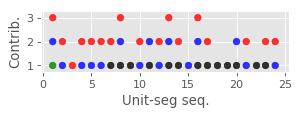

In [60]:
plotDiffContSeq(gDiffCont1,'g1Pattern')

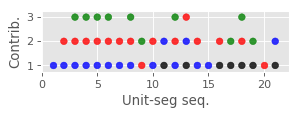

In [61]:
plotDiffContSeq(gDiffCont2,'g2Pattern')

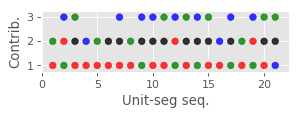

In [62]:
plotDiffContSeq(gDiffCont3,'g3Pattern')

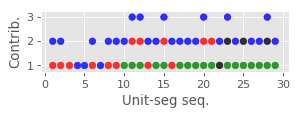

In [63]:
plotDiffContSeq(gDiffCont4,'g4Pattern')

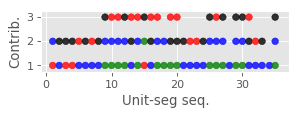

In [64]:
plotDiffContSeq(gDiffCont5,'g5Pattern')

In [65]:

def grpContribValueList(grpData):
    contribNumList=[]
    for d in grpData:
        num=len(d)
        contribNumList.append(num)
        
    return contribNumList
    
    

In [66]:
grp1NumData = grpContribValueList(gDiffCont1)
grp2NumData = grpContribValueList(gDiffCont2)
grp3NumData = grpContribValueList(gDiffCont3)
grp4NumData = grpContribValueList(gDiffCont4)
grp5NumData = grpContribValueList(gDiffCont5)



In [147]:
def calSyncFromColabNumList(groupList, gSize):
    syncList = []
    for value in groupList:
        sync = synchronyMeasure(gSize, value)
        sync = round(sync,3)
        syncList.append(sync)
    
    return syncList
    

In [150]:
grp1SyncData = calSyncFromColabNumList(grp1NumData, 4)
grp2SyncData = calSyncFromColabNumList(grp2NumData, 4)
grp3SyncData = calSyncFromColabNumList(grp3NumData, 4)
grp4SyncData = calSyncFromColabNumList(grp4NumData, 4)
grp5SyncData = calSyncFromColabNumList(grp5NumData, 4)

In [159]:
grp1Sync = pd.DataFrame(grp1SyncData)
grp2Sync = pd.DataFrame(grp2SyncData)
grp3Sync = pd.DataFrame(grp3SyncData)
grp4Sync = pd.DataFrame(grp4SyncData)
grp5Sync = pd.DataFrame(grp5SyncData)

#grp1Sync.to_csv("C:/Users/User/Desktop/CSCW_Paper/gData/grpData1.csv")
#grp2Sync.to_csv("C:/Users/User/Desktop/CSCW_Paper/gData/grpData2.csv")
#grp3Sync.to_csv("C:/Users/User/Desktop/CSCW_Paper/gData/grpData3.csv")
#grp4Sync.to_csv("C:/Users/User/Desktop/CSCW_Paper/gData/grpData4.csv")
#grp5Sync.to_csv("C:/Users/User/Desktop/CSCW_Paper/gData/grpData5.csv")


In [48]:
t = 'mine'
t2 = 'C:/Users/User/Desktop/CSCW_Paper/'+t+'.jpg'

print t2

C:/Users/User/Desktop/CSCW_Paper/mine.jpg


In [2]:
m=[1,2,3,4,5]
print sum(m)

15
